In [61]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='fivethirtyeight')
pd.options.display.float_format = '{:,.0f}'.format

In [62]:
data=pd.read_csv('Walmart_Sales.csv')

data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,691",0,42,3,211,8
1,1,12-02-2010,"1,641,957",1,39,3,211,8
2,1,19-02-2010,"1,611,968",0,40,3,211,8


In [63]:
print(data.shape)

(6435, 8)


In [64]:
print(data.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [65]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [66]:
data.columns = data.columns.str.lower()

In [67]:
data.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [68]:
# checking duplicates
data.duplicated().sum()

0

In [69]:
# Correcting the date format
data['date'] = pd.to_datetime(data['date'],format = "%d-%m-%Y")


In [70]:
def Sesson_getter(quarter):
    if quarter ==1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'

In [71]:

data['year'] = data['date'].dt.year # to add a year column
data['quarter'] = data['date'].dt.quarter # to add a quarter column (q1, q2, q3 and q3)
data['season'] = data['quarter'].apply(Sesson_getter) # applied the previously defined function to get the season names
data['month'] = data['date'].dt.month # to add a month coumn
data['month_name'] = data['date'].dt.month_name() # to add a month_name column
data['week'] = data['date'].dt.isocalendar().week # to add a week column
data['day_of_week'] = data['date'].dt.day_name() # to add a day_name column

data.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7,Friday


In [72]:
data.tail()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
6430,45,2012-09-28,"713,174",0,65,4,192,9,2012,3,Summer,9,September,39,Friday
6431,45,2012-10-05,"733,455",0,65,4,192,9,2012,4,Fall,10,October,40,Friday
6432,45,2012-10-12,"734,464",0,54,4,192,9,2012,4,Fall,10,October,41,Friday
6433,45,2012-10-19,"718,126",0,56,4,192,9,2012,4,Fall,10,October,42,Friday
6434,45,2012-10-26,"760,281",0,59,4,192,9,2012,4,Fall,10,October,43,Friday


In [73]:
data[['weekly_sales','temperature','fuel_price', 'cpi', 'unemployment']].describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,172,8
std,"564,367",18,0,39,2
min,"209,986",-2,2,126,4
25%,"553,350",47,3,132,7
50%,"960,746",63,3,183,8
75%,"1,420,159",75,4,213,9
max,"3,818,686",100,4,227,14


In [74]:
# Convert columns to numeric and coerce errors to NaN
data['week'] = pd.to_numeric(data['week'], errors='coerce')
data['weekly_sales'] = pd.to_numeric(data['weekly_sales'], errors='coerce')

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in either column
data.dropna(subset=['week', 'weekly_sales'], inplace=True)
data.to_csv('cleaned_dataset.csv', index=False)

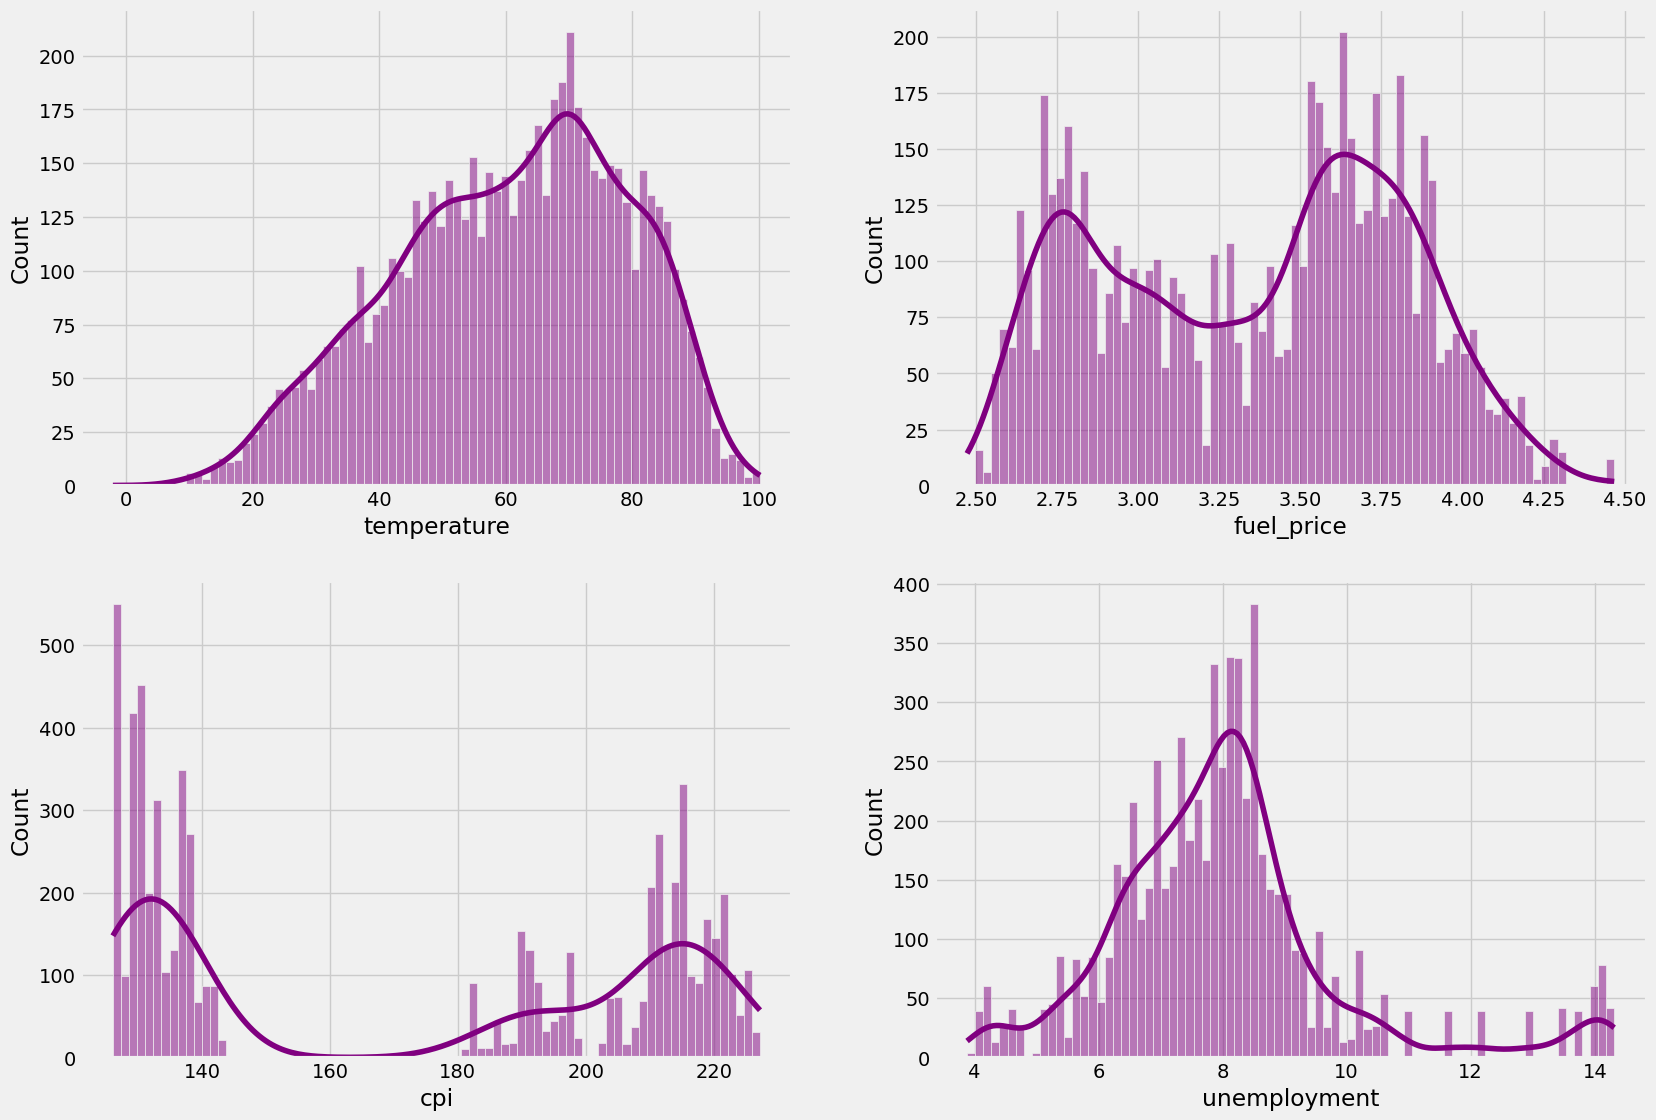

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

columns = ['temperature','fuel_price', 'cpi', 'unemployment']

plt.figure(figsize = (18, 20))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = data, x = col, kde = True, bins = round(np.sqrt(len(data))), color = 'purple') # Applied Square Root Rule for bins count
plt.show()

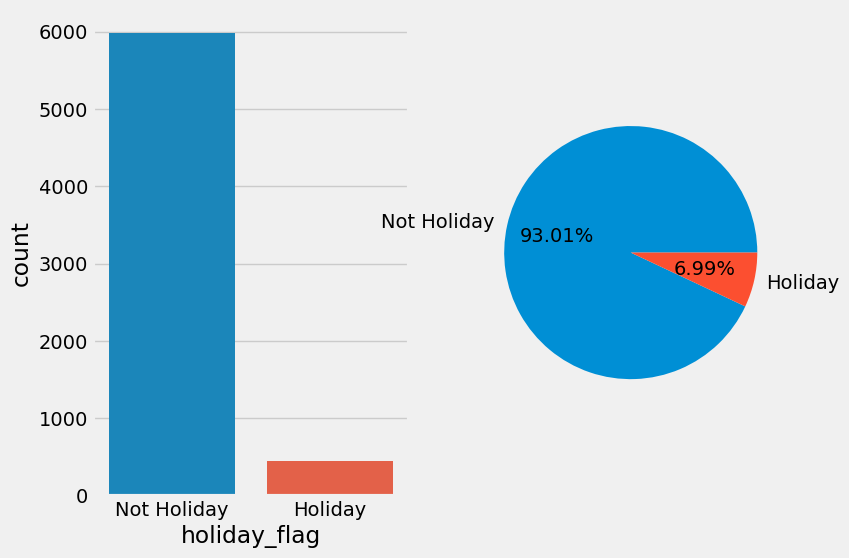

In [76]:
data2=data.copy()
data2['holiday_flag']=data2['holiday_flag'].map({0:'Not Holiday',1:'Holiday'})
fig, ax = plt.subplots(1, 2, figsize = (8, 6))

sns.countplot(data = data2, x = 'holiday_flag', ax=ax[0])

ax[1].pie(data2['holiday_flag'].value_counts().values,
         labels=data2['holiday_flag'].value_counts().index, autopct ='%1.2f%%')
plt.show()

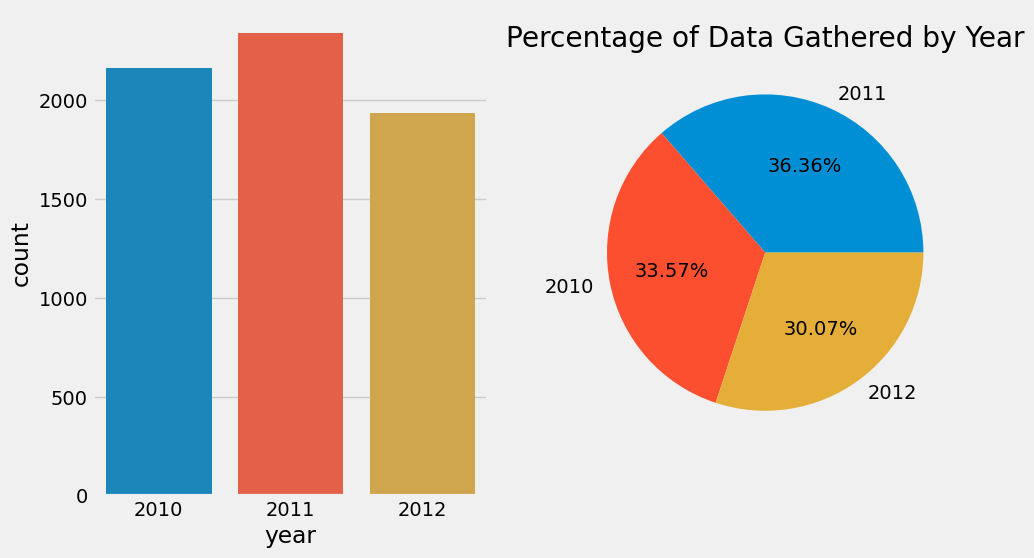

In [77]:
year_counts = data['year'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

# Bar plot for the year counts
sns.countplot(data = data, x = 'year', ax=ax[0])

# Pie chart for the year counts
ax[1].pie(year_counts.values,
         labels = year_counts.index, 
         autopct = '%1.2f%%')

# Set the title for the pie chart
ax[1].set_title("Percentage of Data Gathered by Year")

# Display the plots
plt.show()


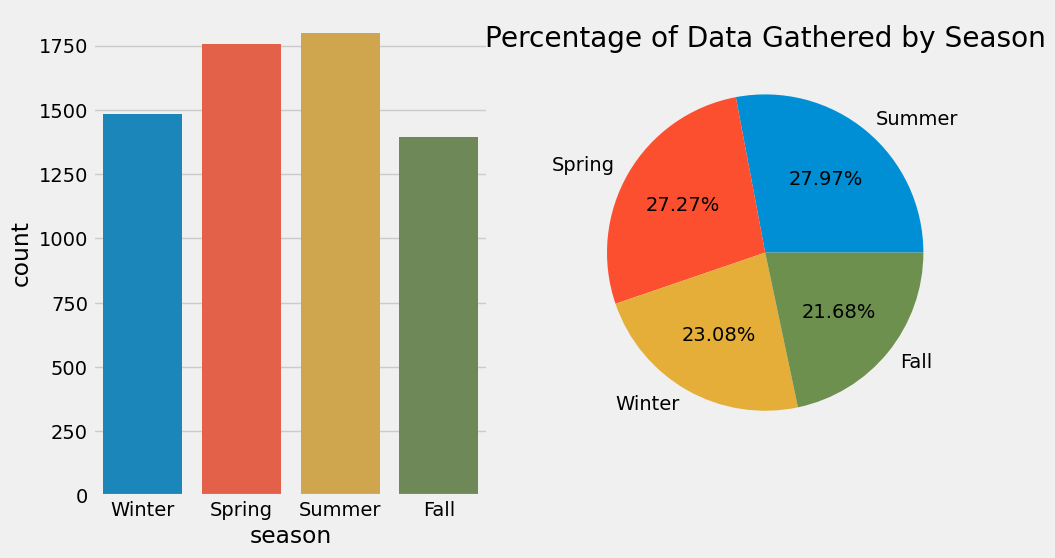

In [78]:
season_counts = data['season'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(data = data, x = 'season', ax=ax[0])

ax[1].pie(data['season'].value_counts().values,
         labels = data['season'].value_counts().index, 
         autopct = '%1.2f%%')

ax[1].set_title("Percentage of Data Gathered by Season")
plt.show()

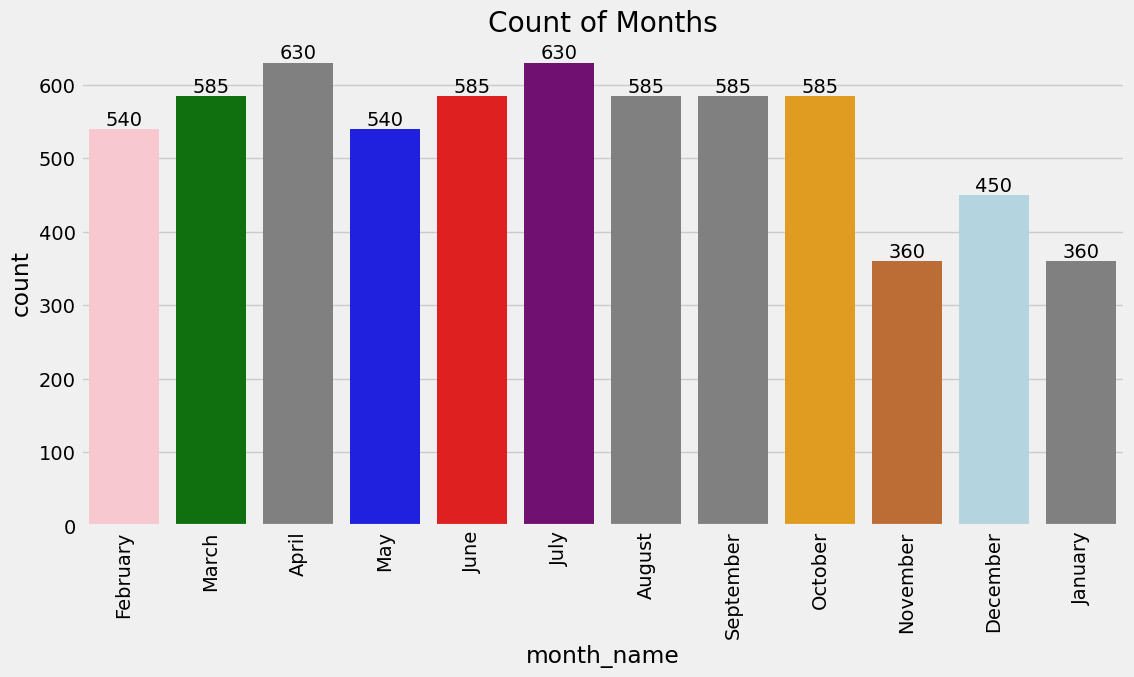

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for each month
month_colors = {
    'January': 'grey', 'February': 'pink', 'March': 'green', 'April': 'grey',
    'May': 'blue', 'June': 'red', 'July': 'purple', 'August': 'grey',
    'September': 'grey', 'October': 'orange', 'November': '#D2691E', 'December': '#ADD8E6' #lightblue
}

# Countplot with custom colors
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='month_name', palette=month_colors)

# Add labels to bars
for bar in ax.containers:
    ax.bar_label(bar)

# Rotate x-axis labels and set title
plt.xticks(rotation=90)
ax.set_title("Count of Months")

# Show plot
plt.show()


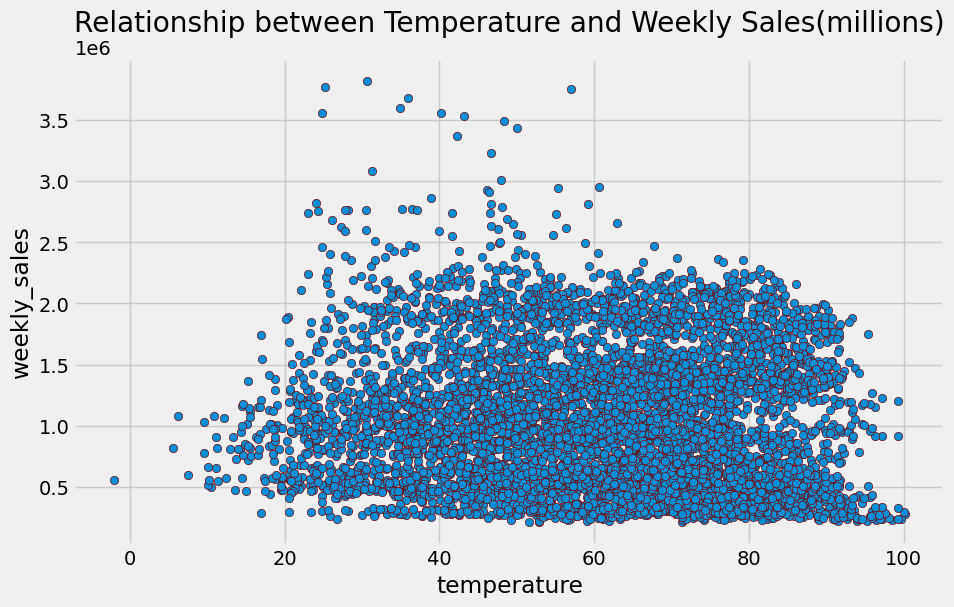

In [80]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data,
                x='temperature',
                y='weekly_sales',
                edgecolor='maroon')

plt.title("Relationship between Temperature and Weekly Sales(millions)")
plt.show()


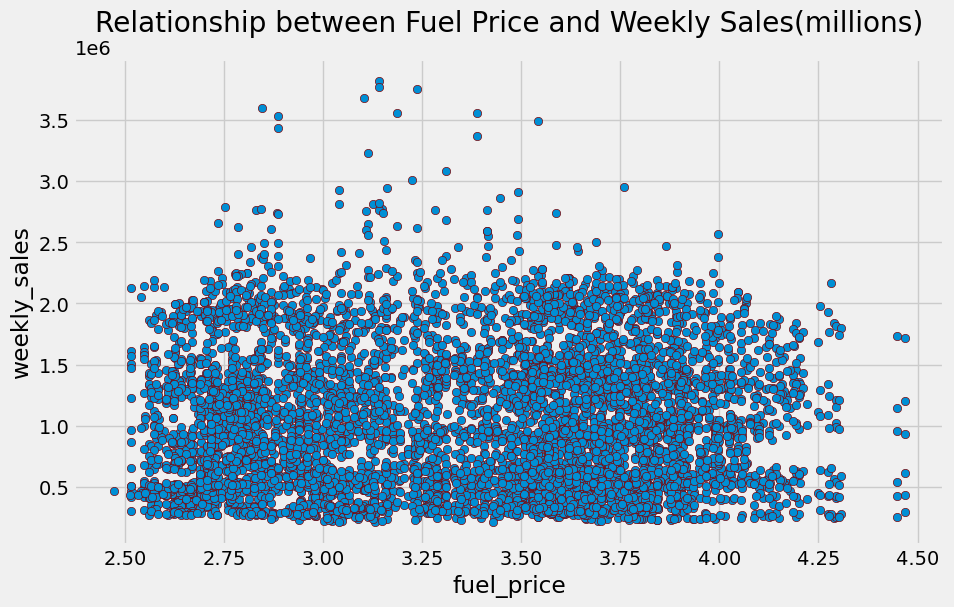

In [81]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = data,
           x = 'fuel_price',
           y = 'weekly_sales',
           edgecolor = 'maroon')

plt.title("Relationship between Fuel Price and Weekly Sales(millions)")
plt.show()

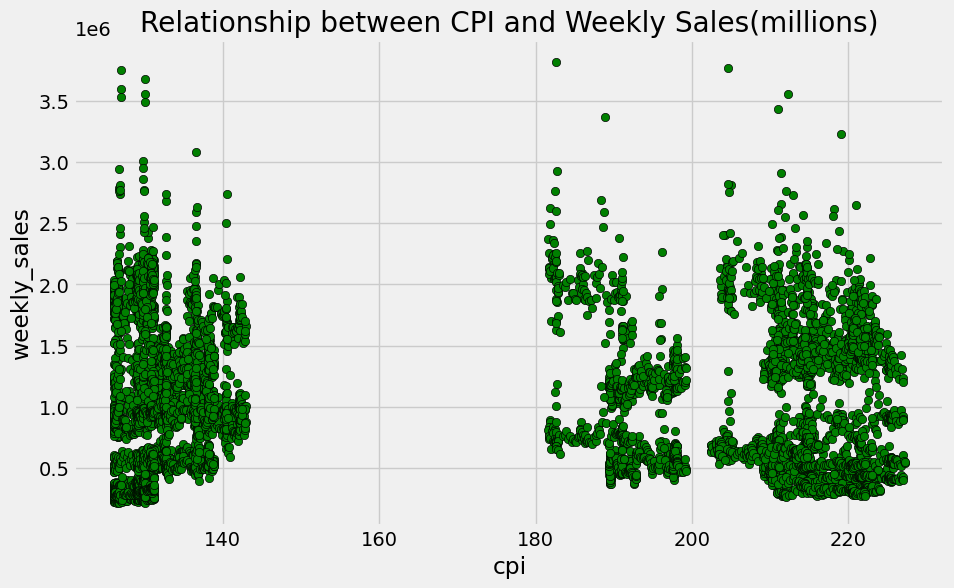

In [82]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = data,
           x = 'cpi',
           y = 'weekly_sales',
           color = 'green',
           edgecolor = 'black')
plt.title("Relationship between CPI and Weekly Sales(millions)")
plt.show()

# average sales on holiday and regular days

In [83]:
data.groupby('holiday_flag')['weekly_sales'].mean()

holiday_flag
0   1,041,256
1   1,122,888
Name: weekly_sales, dtype: float64

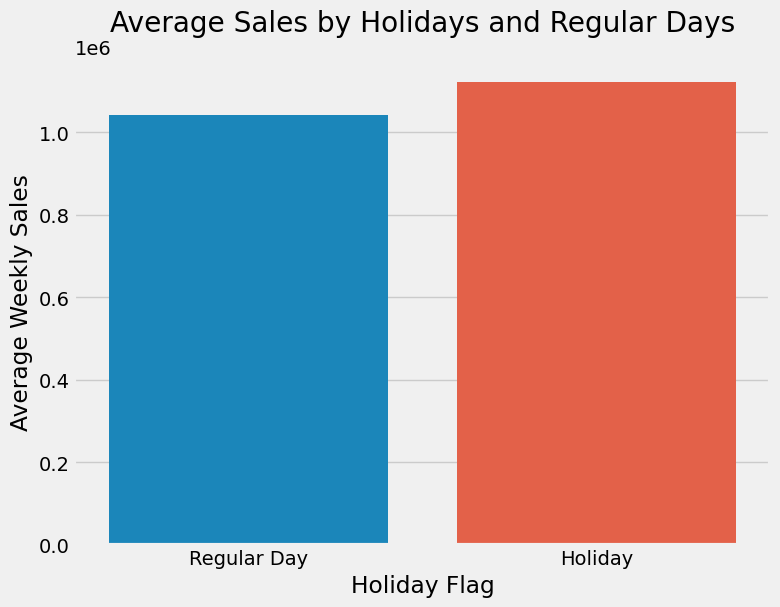

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data,
            x='holiday_flag',
            y='weekly_sales',
            estimator=np.mean,
            ci=False)

# Update the x-axis labels
plt.xticks(ticks=[0, 1], labels=['Regular Day', 'Holiday'])

plt.title('Average Sales by Holidays and Regular Days')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()


# Total sales on holiday and regular days

In [85]:
data.groupby('holiday_flag')['weekly_sales'].sum()

holiday_flag
0   6,231,919,436
1     505,299,552
Name: weekly_sales, dtype: float64

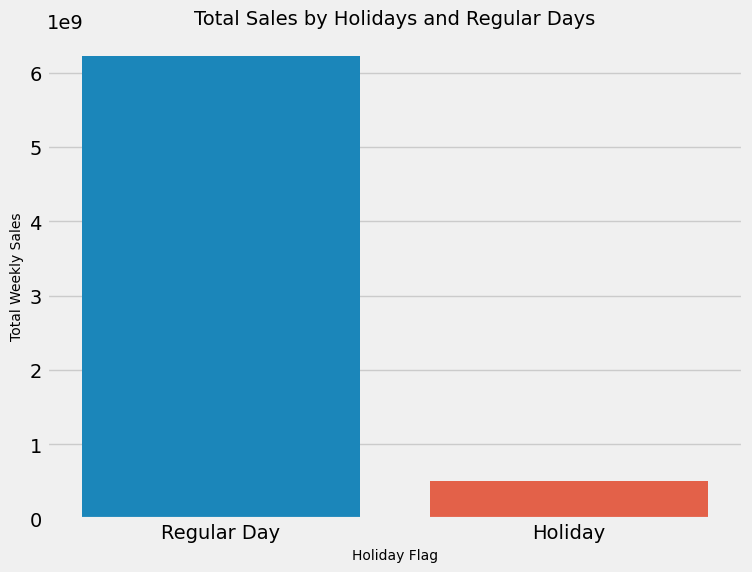

In [86]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data,
           x = 'holiday_flag',
           y = 'weekly_sales',
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by Holidays and Regular Days', size = 14)
plt.xlabel('Holiday Flag', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.xticks(ticks=[0, 1], labels=['Regular Day', 'Holiday'])
plt.show()

# Which Branch is performing better?

<Axes: xlabel='store'>

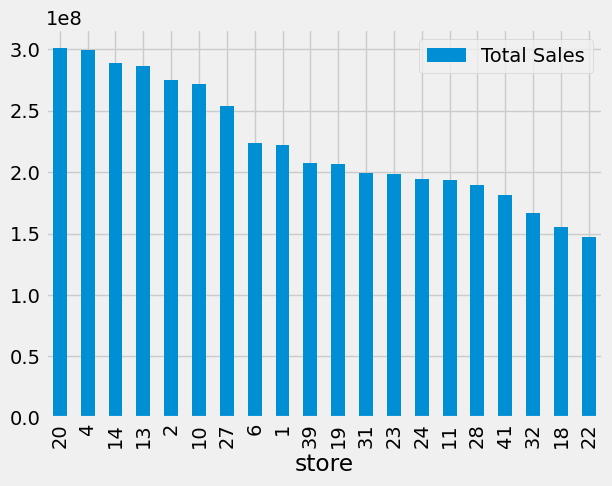

In [87]:
best_branch =  data.groupby('store')['weekly_sales'].sum().sort_values(ascending = False).to_frame('Total Sales').sort_values(by='Total Sales',ascending=False)
best_branch.head(20).plot(kind='bar')


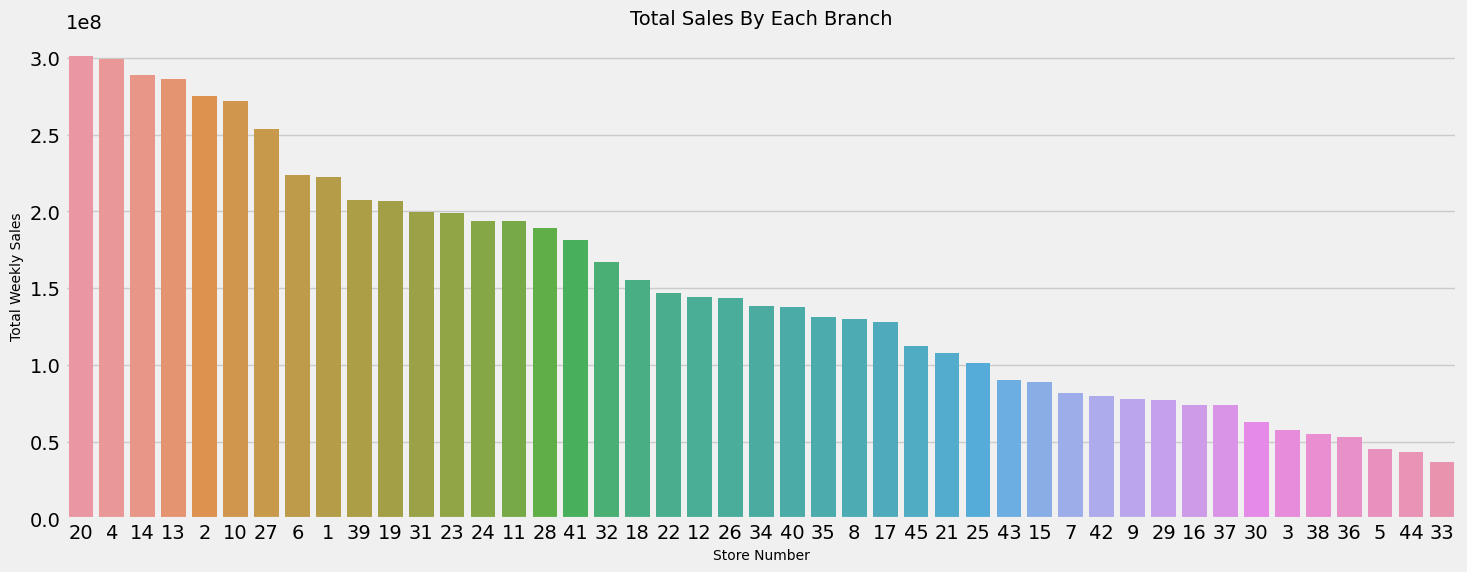

In [88]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
           x = 'store',
           y = 'weekly_sales',
           order = best_branch.index,
           estimator = np.sum,
           ci = False)

plt.title('Total Sales By Each Branch', size = 14)
plt.xlabel('Store Number', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

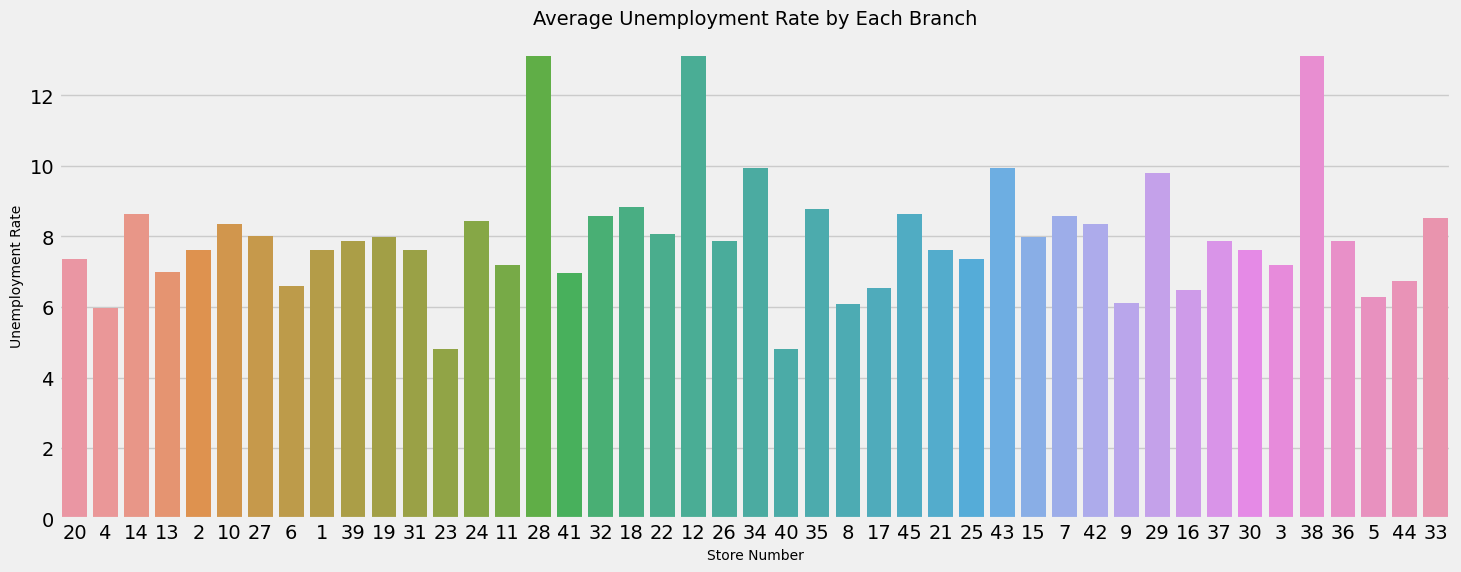

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 6))
sns.barplot(data=data,
            x='store',
            y='unemployment',
            order=best_branch.index,
            estimator=np.mean,  # Change np.sum to np.mean for average
            ci=False)

plt.title('Average Unemployment Rate by Each Branch', size=14)
plt.xlabel('Store Number', size=10)
plt.ylabel('Unemployment Rate', size=10)
plt.show()


In [90]:
data.dtypes

store                    int64
date            datetime64[ns]
weekly_sales           float64
holiday_flag             int64
temperature            float64
fuel_price             float64
cpi                    float64
unemployment           float64
year                     int32
quarter                  int32
season                  object
month                    int32
month_name              object
week                    UInt32
day_of_week             object
dtype: object

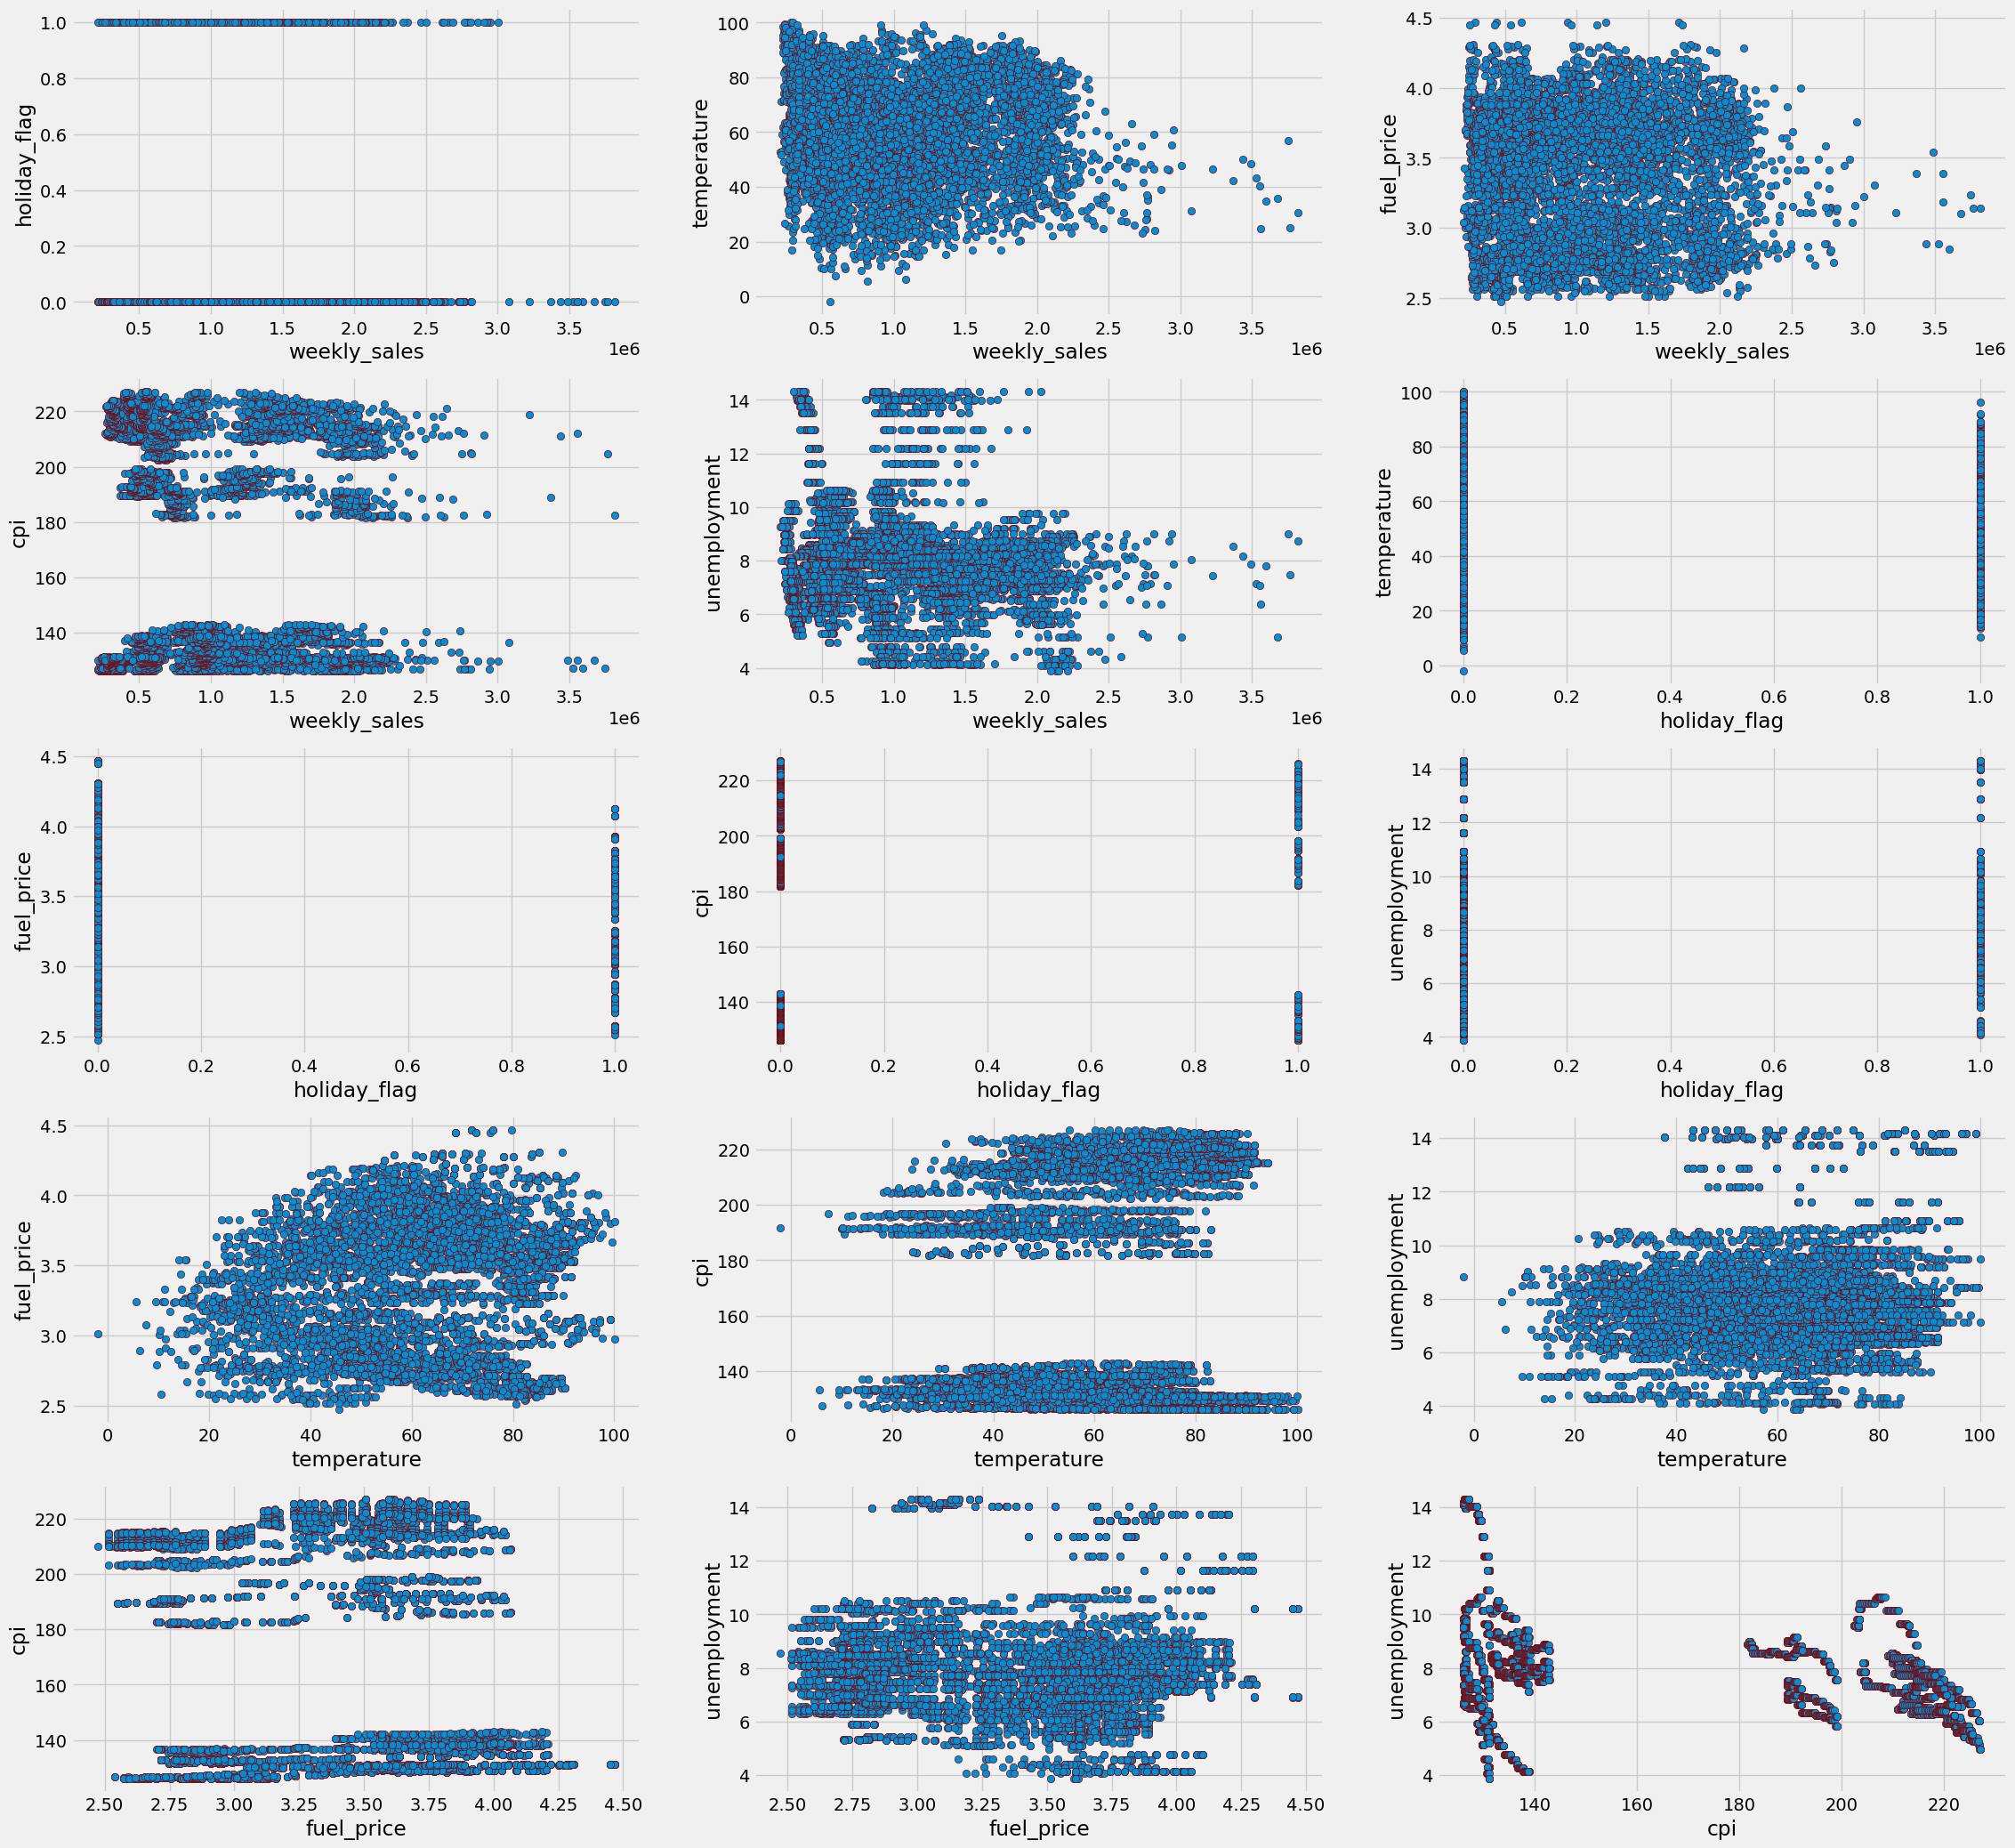

In [91]:
feature=[]

for col in data.columns:
    if (data[col].dtypes=='float64' or data[col].dtypes=='int64'):
        feature.append(col)
feature.remove('store')
no=len(feature)
fig_=0

plt.figure(figsize = (25, 35))

for i,col1 in enumerate(feature):
    for p in range(i+1,no):
        fig_=fig_+1
        
        plt.subplot(7,3,fig_)
    
        sns.scatterplot(data = data,
        x = col1,
        y = feature[p],
        edgecolor = 'maroon')
plt.show()  

In [92]:
pd.pivot_table(data = data,
              index = 'year',
              columns = 'season',
              values = 'weekly_sales',
              aggfunc = 'sum')

season,Fall,Spring,Summer,Winter
year,,,,
2010,"708,775,727","610,369,475","597,488,133","372,252,786"
2011,"681,501,740","597,948,054","639,358,470","529,391,743"
2012,"184,361,680","618,297,715","605,005,763","592,467,702"


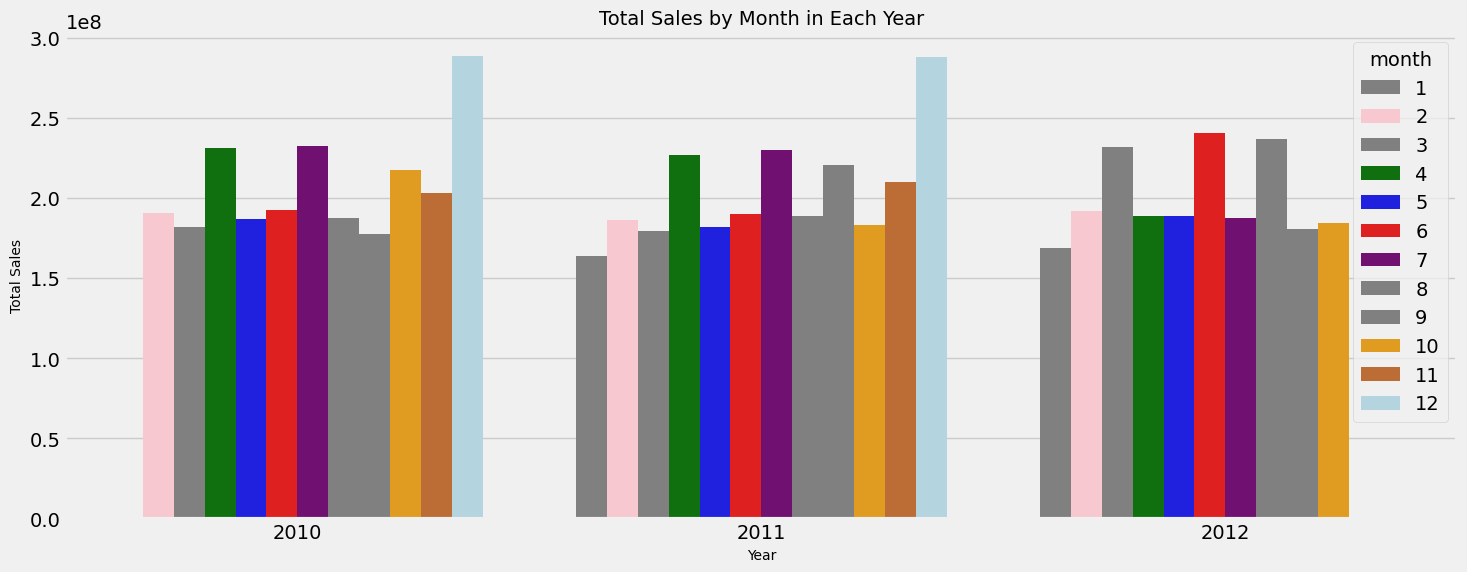

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the color palette
color_palette = {
    1: 'grey',    # January
    2: 'pink',    # February
    3: 'grey', # March
    4: 'green',    # April
    5: 'blue',  # May
    6: 'red',    # June
    7: 'purple',  # July
    8: 'grey',    # August
    9: 'grey',    # September
    10: 'orange',   # October
    11: '#D2691E',    # November
    12: '#ADD8E6'  # December
}


plt.figure(figsize=(16, 6))

# Create the bar plot with the specified color palette
sns.barplot(data=data,
            x='year',
            y='weekly_sales',
            hue='month',
            estimator=np.sum,
            ci=False,
            palette=color_palette)  # Apply the color palette

plt.title('Total Sales by Month in Each Year', size=14)
plt.xlabel('Year', size=10)
plt.ylabel('Total Sales', size=10)
plt.show()


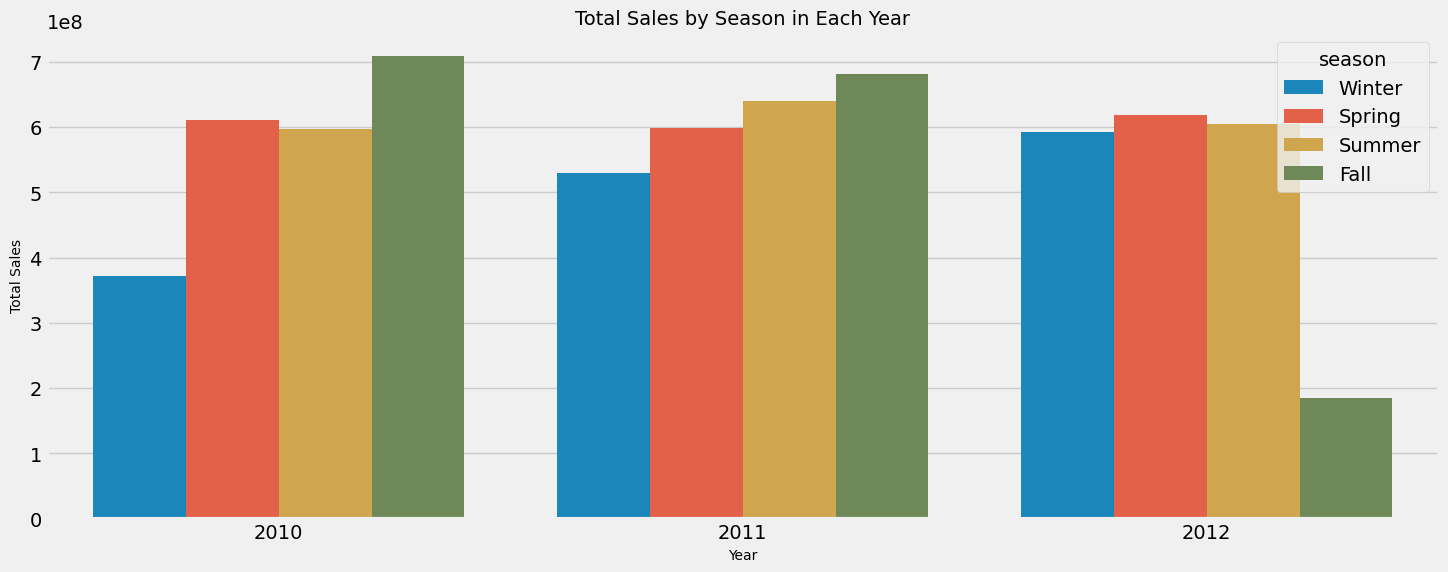

In [52]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
           x = 'year',
           y = 'weekly_sales',
           hue = 'season',
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by Season in Each Year', size = 14)
plt.xlabel('Year', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

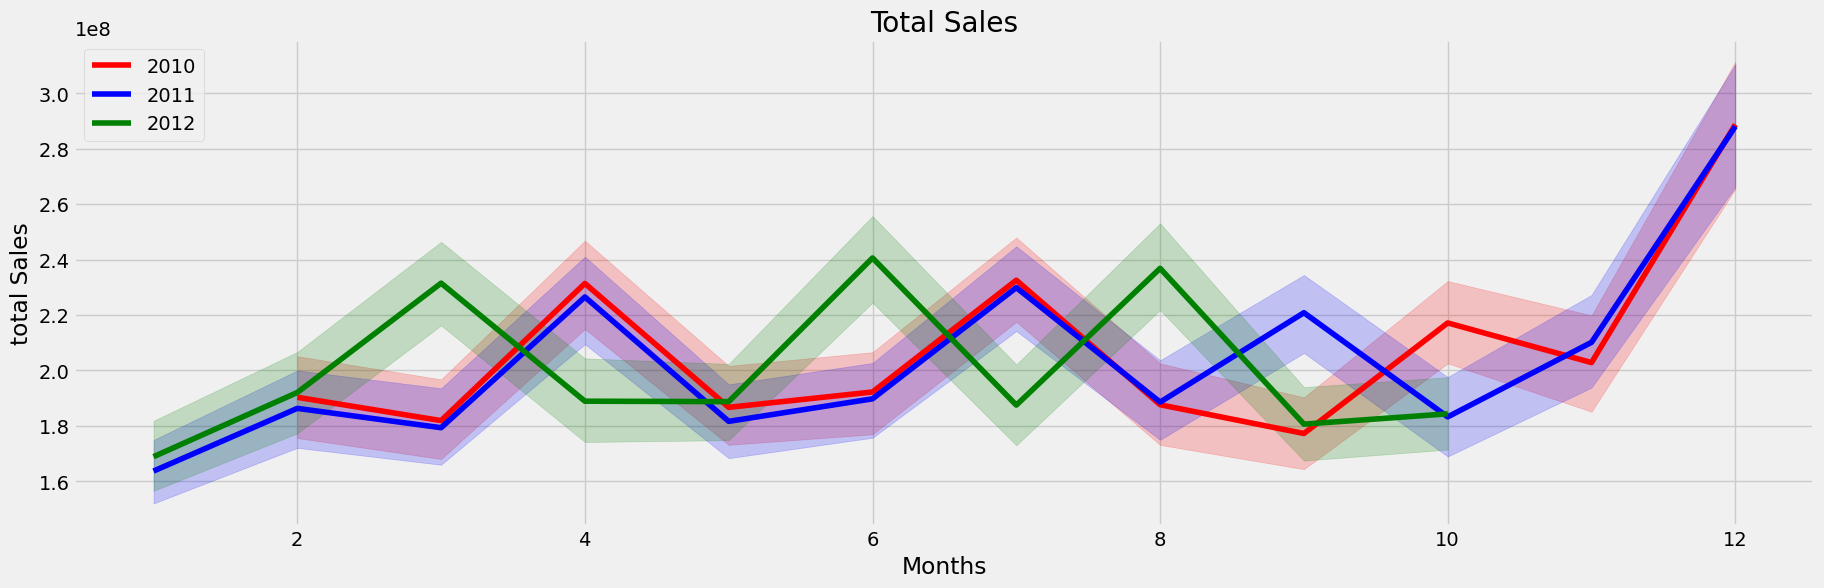

In [50]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (20, 6))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year']==int(year)], 
                x = 'month',
                y = 'weekly_sales',
                estimator = np.sum,
                color = colors[i],
                label = year)
plt.title('Total Sales')
plt.xlabel('Months')
plt.ylabel('total Sales')
plt.show()

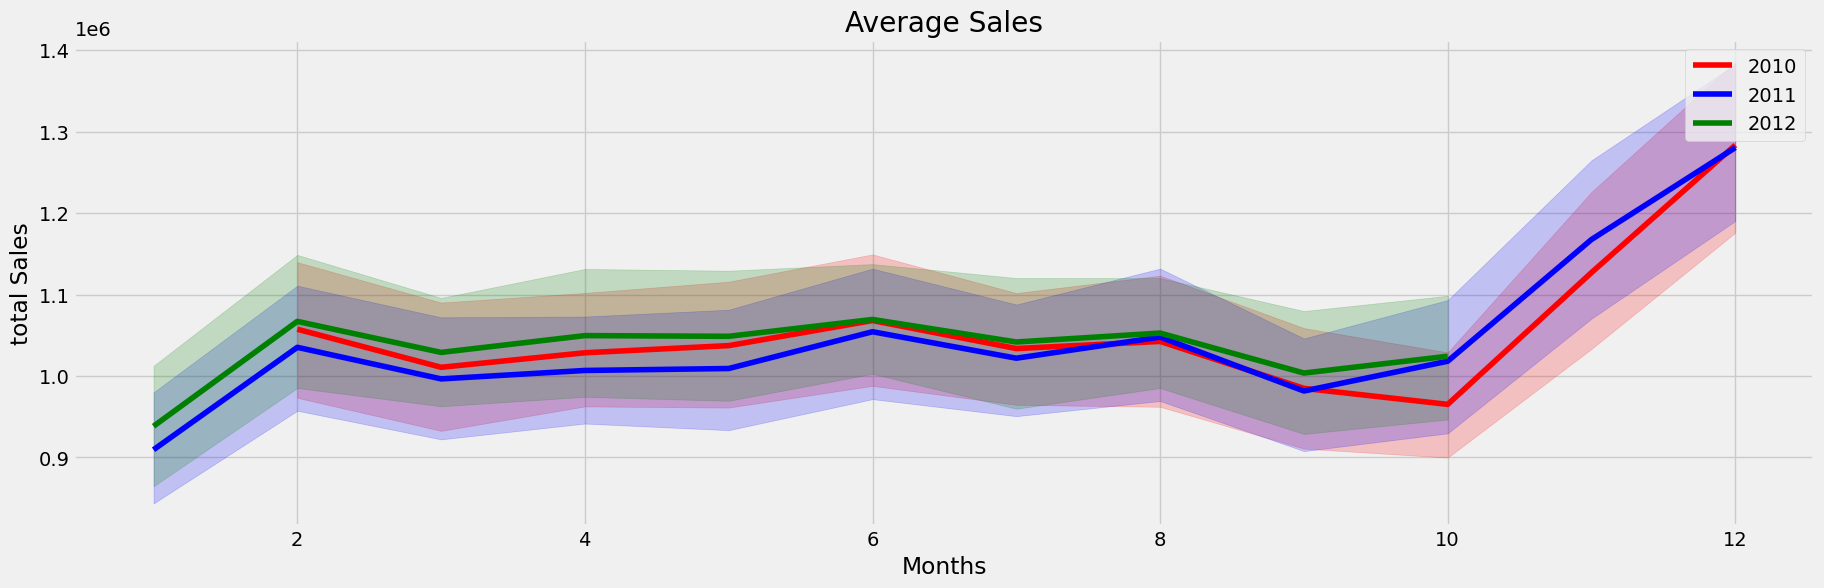

In [51]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (20, 6))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year']==int(year)], 
                x = 'month',
                y = 'weekly_sales',
                estimator = np.mean,
                color = colors[i],
                label = year)
plt.title('Average Sales')
plt.xlabel('Months')
plt.ylabel('total Sales')
plt.show()

# find the best store for each year

In [55]:
df=data.groupby(by=['year','store'])['weekly_sales'].agg('sum').to_frame('Total Sales').reset_index()
df['rank year wise']=df.groupby(by=['year'])['Total Sales'].rank(method='dense',ascending=False)
df[df['rank year wise']==1].reset_index()[['year','store','Total Sales']]

,year,store,Total Sales
0,2010,14,"105,462,242"
1,2011,4,"111,092,293"
2,2012,4,"92,771,189"
